# Music Recommendation System using KNN algorithm

#### Importing necessary libraries and loading the data

In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Load data
data = pd.read_csv("data.csv")
data_by_year = pd.read_csv("data_by_year.csv")
data_by_genres = pd.read_csv("data_by_genres.csv")
data_by_artist = pd.read_csv("data_by_artist.csv")

# Displaying the first few rows of each dataset
print("Data.csv")
display(data.head())
print("Data by Year")
display(data_by_year.head())
print("Data by Genres")
display(data_by_genres.head())
print("Data by Artist")
display(data_by_artist.head())


Data.csv


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Data by Year


,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


Data by Genres


,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


Data by Artist


,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


#### Check for duplicates

In [10]:
# Check for missing values in each dataset
print("Missing values in data.csv:", data.isnull().sum())
print("Missing values in data_by_year.csv:", data_by_year.isnull().sum())
print("Missing values in data_by_genres.csv:", data_by_genres.isnull().sum())
print("Missing values in data_by_artist.csv:", data_by_artist.isnull().sum())

# Selecting relevant features
selected_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                     'speechiness', 'tempo', 'valence', 'popularity']

# Normalize selected features for recommendation purposes
scaler = StandardScaler()
data[selected_features] = scaler.fit_transform(data[selected_features])

X = data[selected_features]
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(X)

Missing values in data.csv: valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64
Missing values in data_by_year.csv: mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64
Missing values in data_by_genres.csv: mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalne

NearestNeighbors(metric='euclidean')

#### Visualizing the data and checking correlation

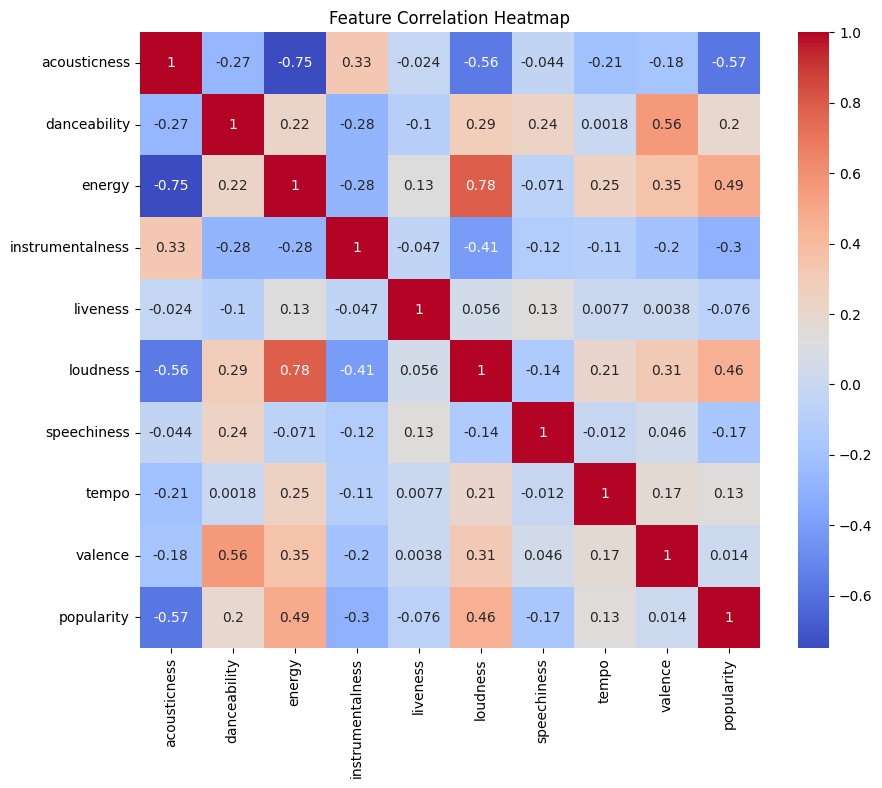

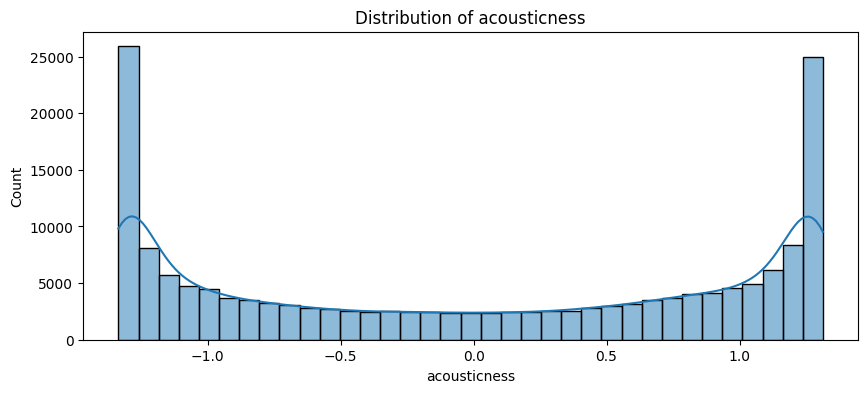

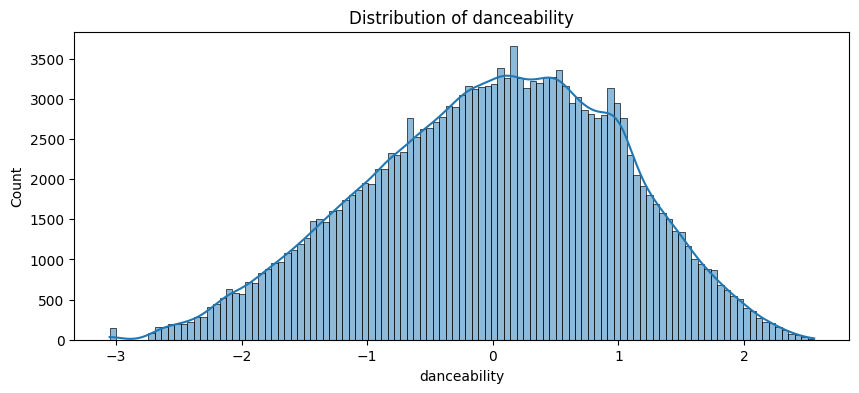

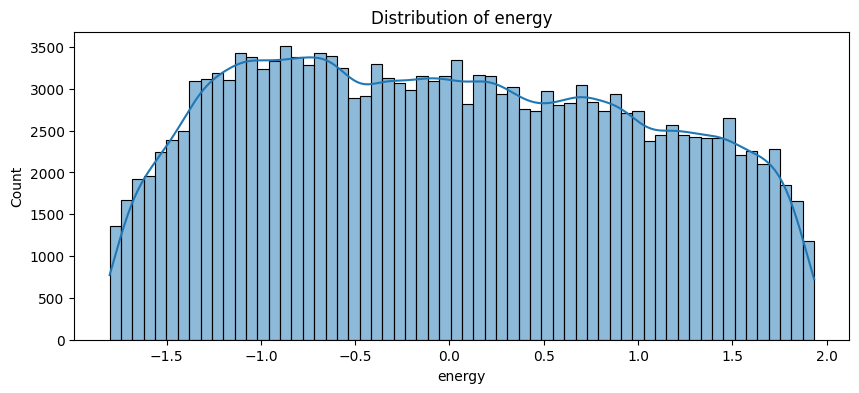

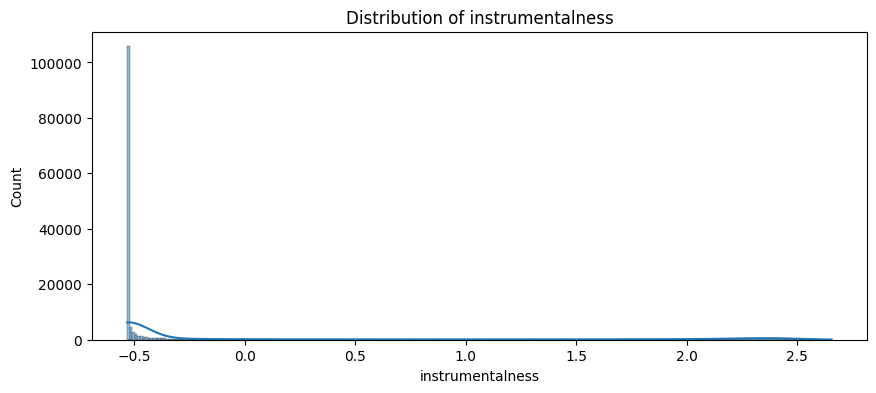

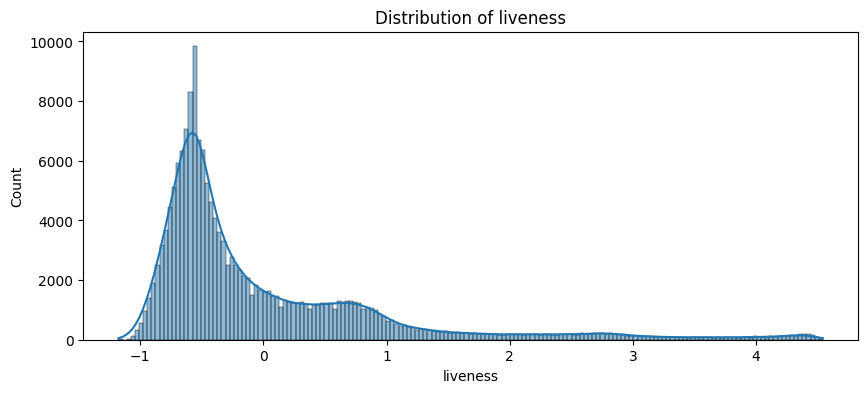

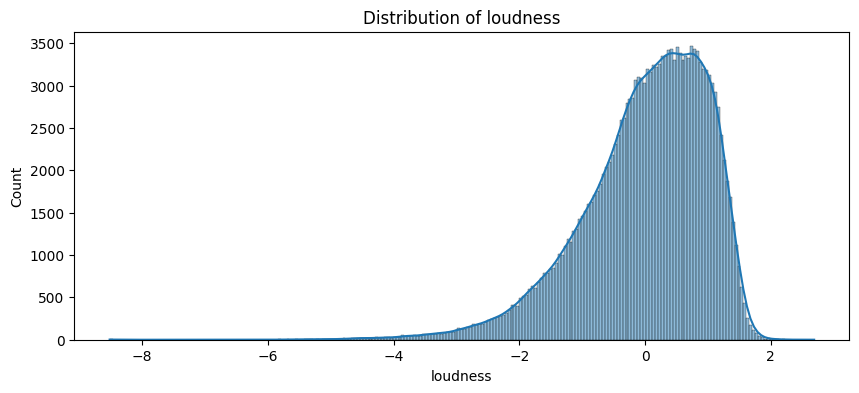

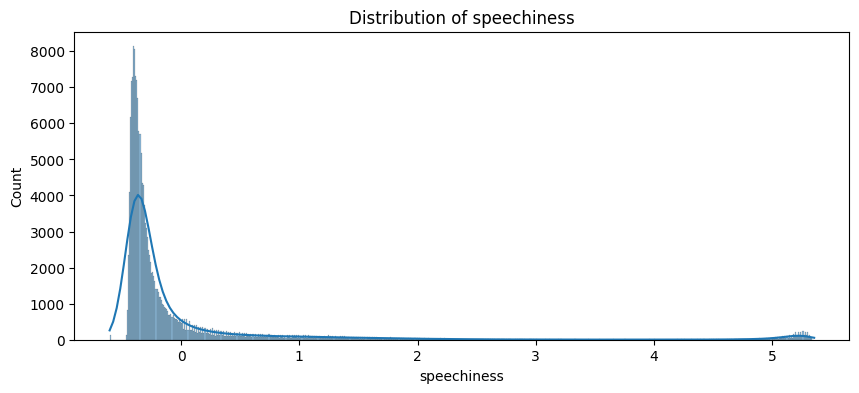

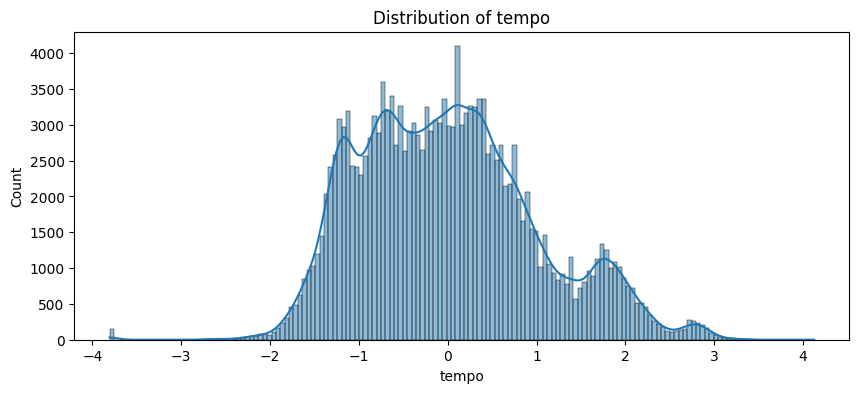

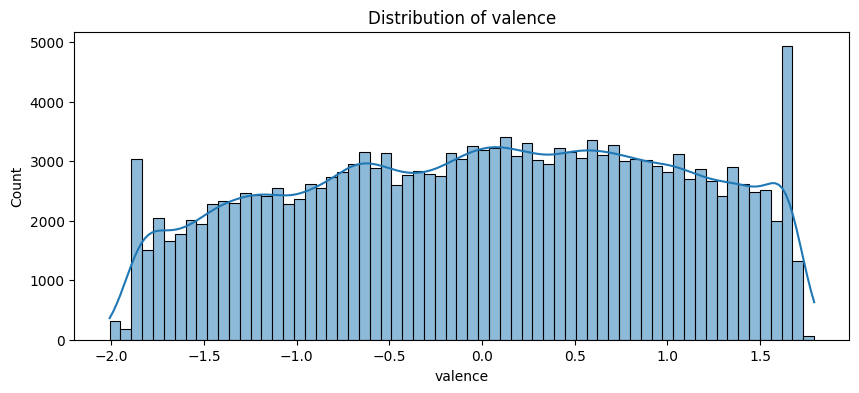

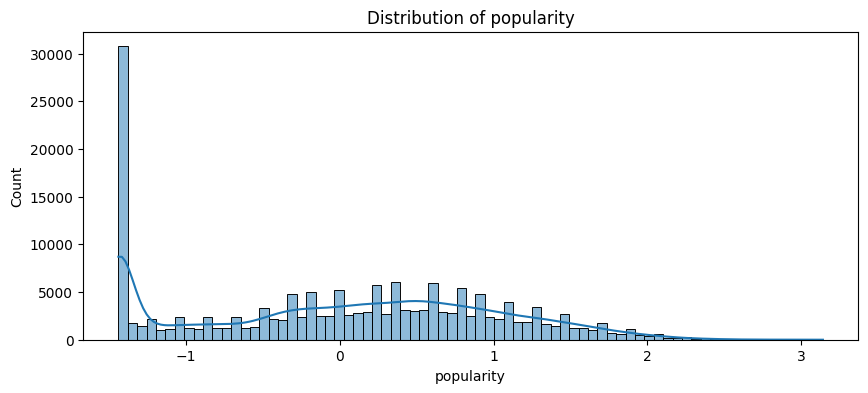

In [11]:
# Visualizing feature correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data[selected_features].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Plotting distributions of key features across datasets
for feature in selected_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.show()


#### Song Recommendation Function

In [12]:
def recommend_song(song_id, num_recommendations=5):
    # Get features of the song with the provided song_id
    song = data[data['id'] == song_id]
    if song.empty:
        return "Song ID not found in the dataset."
    
    # Get the features of the selected song
    song_features = song[selected_features].values
    
    # Find nearest neighbors
    distances, indices = knn.kneighbors(song_features, n_neighbors=num_recommendations + 1)
    
    # Retrieve and display recommended songs
    recommendations = data.iloc[indices[0][1:]]  # Exclude the song itself
    return recommendations[['name', 'artists', 'popularity', 'valence', 'tempo', 'danceability']]


#### Model Evaluation and Testing

In [13]:
# Test the recommendation system with a sample song ID
sample_song_id = data['id'].iloc[0]  # Using the first song ID as a sample
recommendations = recommend_song(sample_song_id)

# Display recommendations
print("Recommendations based on the song:", data.loc[data['id'] == sample_song_id, 'name'].values[0])
display(recommendations)


Recommendations based on the song: Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve


c:\Users\gowth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,name,artists,popularity,valence,tempo,danceability
39,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",-1.394256,-1.782825,-1.169307,-1.467013
76360,Concert for piano and orchestra: III. Phantais...,"['Howard Shelly', 'Kurt Graunke']",-1.440072,-1.860721,-1.288850,-1.836043
1320,"Ballade No. 1 in G Minor, Op. 23","['Frédéric Chopin', 'Vladimir Horowitz']",-0.936098,-1.681750,-1.251629,-1.364820
141492,"Polonaise-Fantaisie in A-Flat, Op.61","['Frédéric Chopin', 'William Kapell']",-1.440072,-1.858061,-1.123489,-1.688431
156029,"Polonaise-Fantaisie in A-Flat, Op.61","['Frédéric Chopin', 'William Kapell']",-1.440072,-1.858061,-1.123489,-1.688431
